# **DAI-101 Data Science**

### **Exploratory Data Analysis (EDA) On Calls Dataset**
#### **Univariate and Multivariate Analysis**


```
Name : Tanishq Tyagi
Branch: Chemical Engineering
Enrollment: 23124038
Sub-Batch: CH4
```




## **What is Exploratory Data Analysis (EDA)?**  

Exploratory Data Analysis (EDA) is the process of analyzing datasets using statistical and visualization techniques to understand patterns, trends, and relationships in data.  

- **Univariate Analysis** examines a single variable using histograms, box plots, and summary statistics.  
- **Bivariate Analysis** explores relationships between two variables using scatter plots, correlation, and pair plots.  

EDA helps identify missing values, outliers, and patterns, making data ready for further analysis or modeling. 🚀


## **State-wise Churn Distribution (Churn = 1)**
### Identifying High Churn Regions




<ipython-input-14-463cbbea4ac4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='State_Code', y='Churn', data=churn_counts, palette="magma", edgecolor="black", linewidth=1.5)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


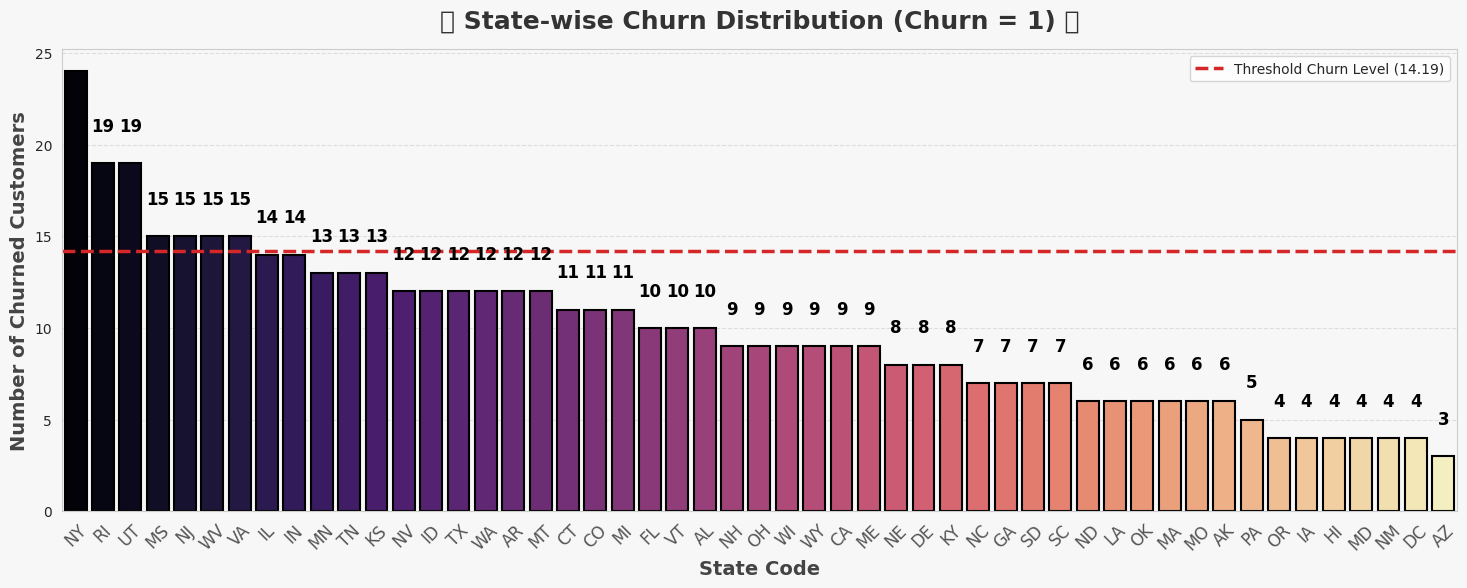

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ufo = pd.read_csv('./train (3).csv')
ufc = ufo[ufo['Churn'] == 1]
churn_counts = ufc.groupby('State_Code', as_index=False)['Churn'].count().sort_values(by='Churn', ascending=False)
threshold_churn_level = churn_counts['Churn'].mean() + churn_counts['Churn'].std()

plt.figure(figsize=(18, 6), facecolor="#f7f7f7")
ax = sns.barplot(x='State_Code', y='Churn', data=churn_counts, palette="magma", edgecolor="black", linewidth=1.5)

plt.title('🔥 State-wise Churn Distribution (Churn = 1) 🔥', fontsize=18, fontweight='bold', color='#333333', pad=15)
plt.xlabel('State Code', fontsize=14, fontweight='bold', color='#444444')
plt.ylabel('Number of Churned Customers', fontsize=14, fontweight='bold', color='#444444')

plt.axhline(y=threshold_churn_level, color='#d62728', linestyle='dashed', linewidth=2.5, label=f'Threshold Churn Level ({threshold_churn_level:.2f})')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height() + 2),
                ha='center', va='center',
                fontsize=12, fontweight='bold', color='black')

plt.xticks(rotation=45, fontsize=12, color='#555555')
plt.grid(axis='y', linestyle='--', alpha=0.6)
ax.set_facecolor("#f7f7f7")
plt.legend()
plt.show()


## Conclusion:

<li>After identifying the states that are above the threshold churn level(i.e. mean+ standard deviation) (7 states in this case).</li>
<li>Allocate resources, marketing efforts, and customer retention strategies to address the specific challenges in these high-churn states.</li>
<li>Implement or enhance a feedback mechanism to collect insights directly from customers in high-churn states.</li>
<li>Explore the competitive landscape in high-churn states. Understand what competitors might be offering that attracts customers away from the company's services.</li>


## **Area Code-wise Churn Distribution**
### Analyzing Churn Trends Across Different Area Codes


<ipython-input-4-cdf20cb59269>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='Area_Code', data=ufc, order=area_code_order, palette=colors)
<ipython-input-4-cdf20cb59269>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(area_code_order)


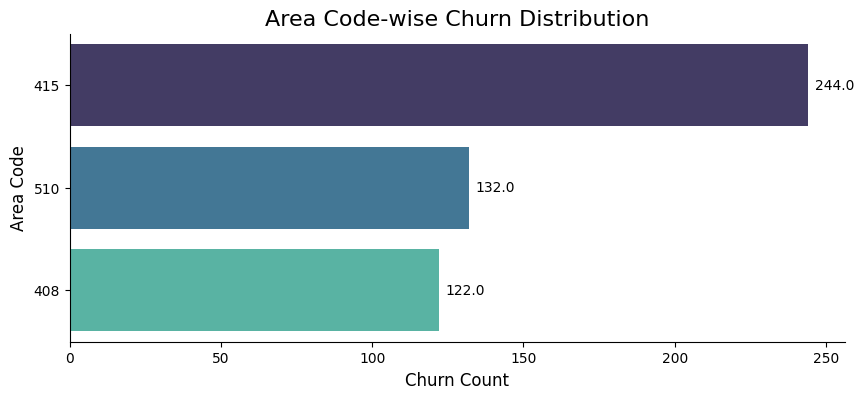

In [4]:
area_code_order = [415, 510, 408]
ufo['Area_Code'] = pd.Categorical(ufo['Area_Code'], categories=area_code_order, ordered=True)

colors = sns.color_palette("mako", n_colors=len(area_code_order))
plt.figure(figsize=(10, 4))
ufc = ufo[ufo['Churn'] == 1]

ax = sns.countplot(y='Area_Code', data=ufc, order=area_code_order, palette=colors)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.title('Area Code-wise Churn Distribution', fontsize=16)
plt.xlabel('Churn Count', fontsize=12)
plt.ylabel('Area Code', fontsize=12)
ax.set_yticklabels(area_code_order)

sns.despine()
plt.show()


##Conclusion:

<li>Identify area codes with higher churn rates.</li>
<li>Implement targeted customer outreach campaigns in high-churn area codes.</li>
<li>Evaluate the quality of service, network coverage, and other factors specific to high-churn area codes.</li>
<li>Tailor promotions or offers based on the unique characteristics of customers in those regions.</li>
<li>Building a positive image in the community can contribute to customer loyalty and reduce churn.</li>


## **Churn Analysis**
### **Univariate Analysis - Churn Distribution**


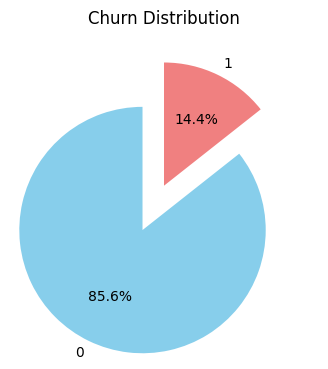

In [5]:
plt.figure(figsize=(4, 4))
churn_counts = ufo['Churn'].value_counts()
ex=[0.4,0]
plt.pie(churn_counts,explode=ex, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Churn Distribution')
plt.show()

### **Overall 14.4% people which counts to 498 have left the service.**

## **Distribution of Area Code for Each State by Churn**
### State-wise Churn Analysis Across Different Area Codes


<ipython-input-6-3f1bb62b64cd>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_to_plot = churned_users.groupby(['State_Code', 'Area_Code'])['Churn'].count().reset_index()


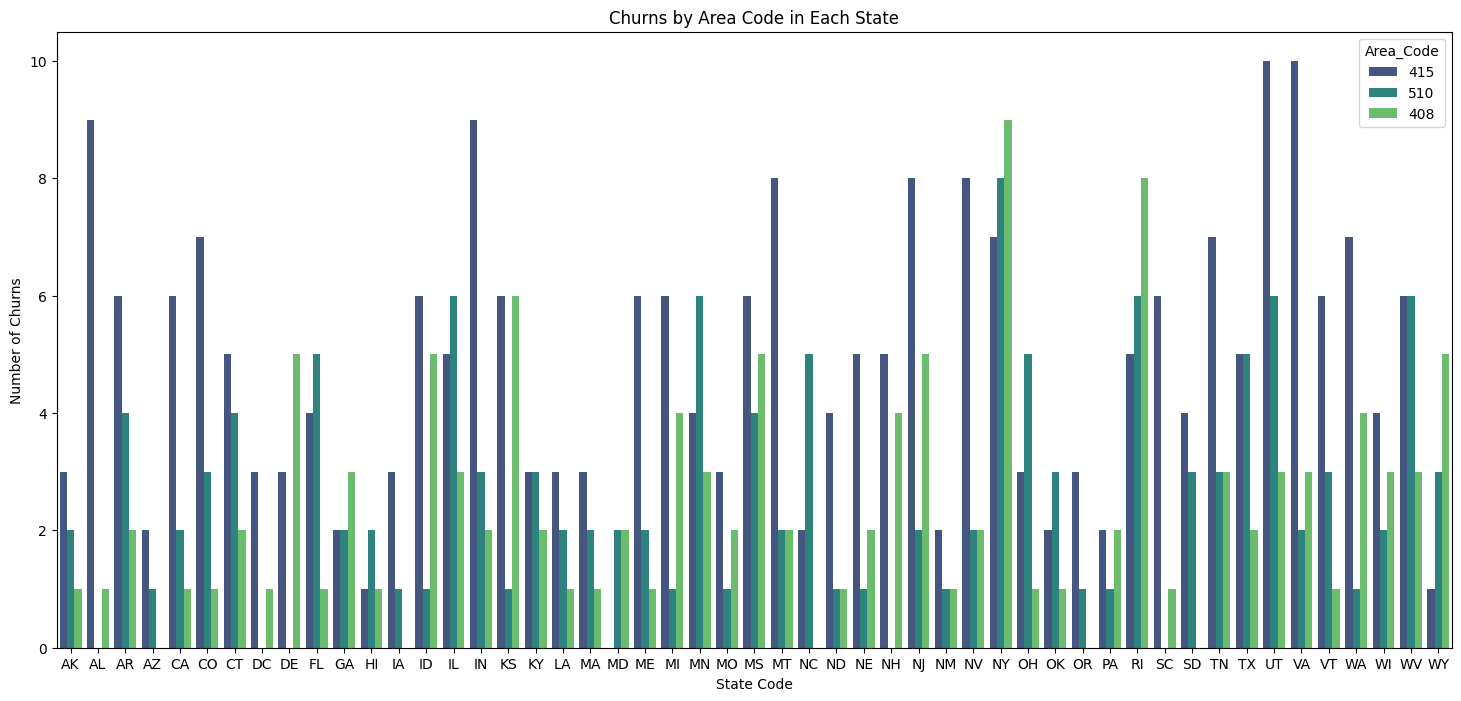

In [6]:
# Assuming 'ufo' is your DataFrame
churned_users = ufo[ufo['Churn'] == 1]

# Group by 'State_Code' and 'Area_Code' and calculate counts
data_to_plot = churned_users.groupby(['State_Code', 'Area_Code'])['Churn'].count().reset_index()

# Set up the bar plot
plt.figure(figsize=(18, 8))
sns.barplot(x='State_Code', y='Churn', hue='Area_Code', data=data_to_plot, palette='viridis')

# Set labels and title
plt.xlabel('State Code')
plt.ylabel('Number of Churns')
plt.title('Churns by Area Code in Each State')

# Show the plot
plt.show()

##Conclusion:<br>
<li>From this graph we tried to show that in a particular state which area has the maximum number of people who left the service.By analyzing this graph we can make changes accordingly in that particular area.The changes includes-:
<li>Enhance network coverage, service quality, or customer support in areas with high churn to improve overall customer satisfaction.
<li>Review pricing strategies in areas with high churn to ensure competitiveness in the market.


## **Distribution of Account Length**
### Analyzing Customer Account Duration Trends



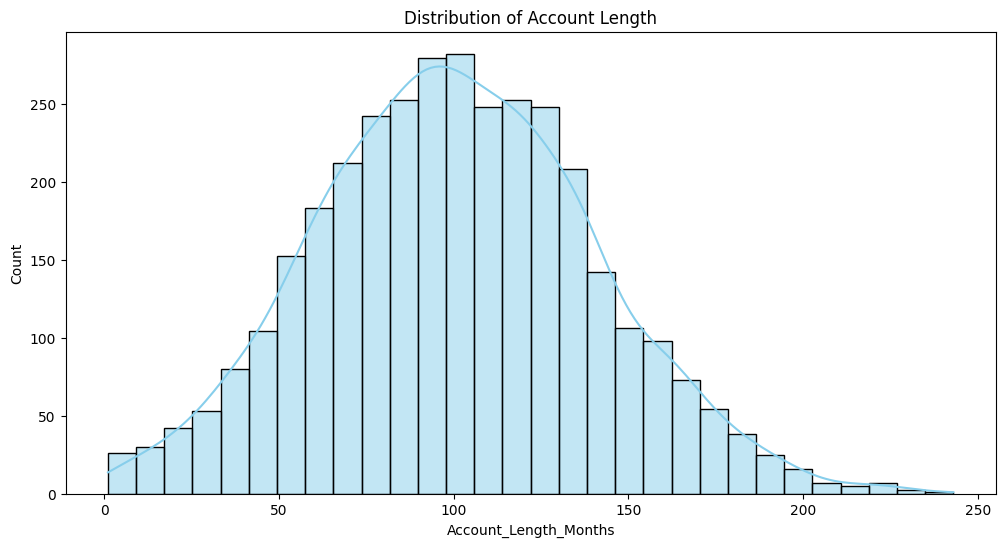

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(ufo['Account_Length_Months'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Account Length')
plt.show()

##Conclusion

<li>For customers with shorter account lengths, focus on effective onboarding processes to ensure a positive initial experience.</li>

<li>For customers with longer account lengths, implement loyalty programs or exclusive benefits to reward and retain them.</li>

<li>Implement retention strategies for customers with shorter account lengths, as they might be more susceptible to churn.</li>


## **Account Length vs. Churn Rate**
### Classifying Customers Leaving the Service Based on Account Duration


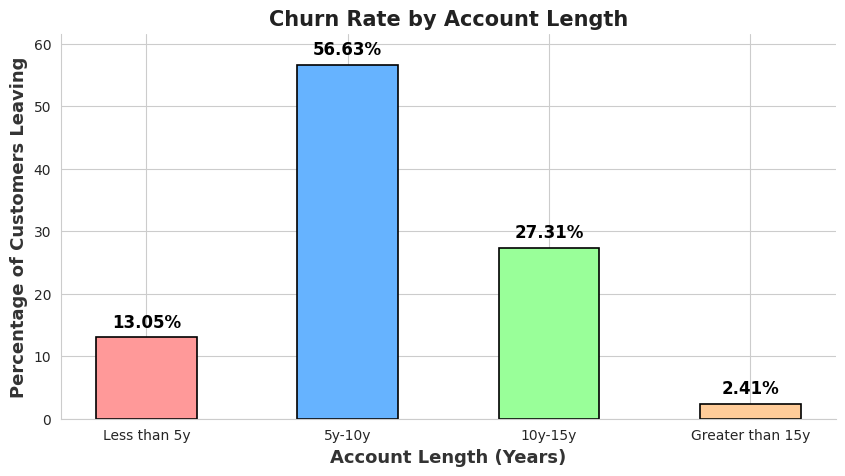

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

p1 = len(ufo[(ufo.Account_Length_Months < 60) & (ufo.Churn == 1)]) / 498 * 100
p2 = len(ufo[(ufo.Account_Length_Months > 60) & (ufo.Account_Length_Months <= 120) & (ufo.Churn == 1)]) / 498 * 100
p3 = len(ufo[(ufo.Account_Length_Months > 120) & (ufo.Account_Length_Months <= 180) & (ufo.Churn == 1)]) / 498 * 100
p4 = len(ufo[(ufo.Account_Length_Months > 180) & (ufo.Churn == 1)]) / 498 * 100

percent = [p1, p2, p3, p4]
acc = ["Less than 5y", "5y-10y", "10y-15y", "Greater than 15y"]

sns.set_style("whitegrid")

colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]

plt.figure(figsize=(10, 5))
bars = plt.bar(acc, percent, width=0.5, color=colors, edgecolor="black", linewidth=1.2)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{bar.get_height():.2f}%',
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.xlabel("Account Length (Years)", fontsize=13, fontweight="bold", color="#333333")
plt.ylabel("Percentage of Customers Leaving", fontsize=13, fontweight="bold", color="#333333")
plt.title("Churn Rate by Account Length", fontsize=15, fontweight="bold", color="#222222")

plt.ylim(0, max(percent) + 5)

sns.despine()
plt.show()

##**Conclusion:**
<br>
1)**Less than 5 years (p1=13%):**

This segment has a relatively lower churn rate, suggesting that newer customers are less likely to leave.
Suggestion: Focus on onboarding processes, welcome programs, and early engagement strategies to strengthen the connection with new customers.

2)**Between 5 to 10 years (p2=56%):**

This segment has a high churn rate, indicating a critical area for improvement.
Suggestion: Investigate reasons behind the high churn in this segment. It could be related to service quality, pricing, or competition. Implement targeted retention strategies, such as loyalty programs or personalized offers, to retain customers in this range.

3)**Between 10 to 15 years (p3=27%):**

The churn rate is lower compared to the 5-10 year range, but still significant.
Suggestion: Similar to the 5-10 year range, identify specific pain points for customers in this segment and implement measures to enhance customer satisfaction. Consider introducing exclusive perks or long-term benefits to incentivize loyalty.

4)**Greater than 15 years (p4=2.5%):**

This segment has a very low churn rate, indicating high customer loyalty.
Suggestion: Recognize and reward long-term customers to reinforce their loyalty. Consider special promotions, exclusive services, or loyalty programs for this group.

## **Impact of Customer Service Calls on Churn Rate**
### Analyzing Churn Based on Account Length and Customer Service Interaction


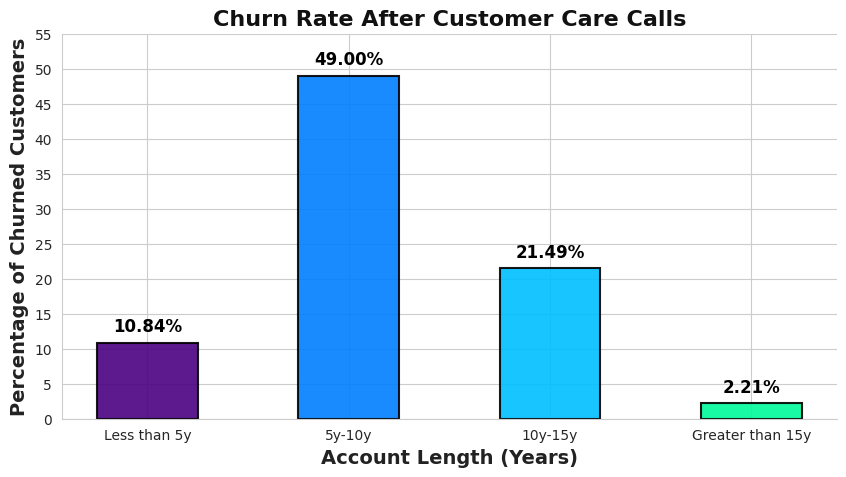

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

p1 = len(ufo[(ufo.Account_Length_Months < 60) & (ufo.Churn == 1) & (ufo.Customer_Service_Calls > 0)]) / 498 * 100
p2 = len(ufo[(ufo.Account_Length_Months > 60) & (ufo.Account_Length_Months <= 120) & (ufo.Churn == 1) & (ufo.Customer_Service_Calls > 0)]) / 498 * 100
p3 = len(ufo[(ufo.Account_Length_Months > 120) & (ufo.Account_Length_Months <= 180) & (ufo.Churn == 1) & (ufo.Customer_Service_Calls > 0)]) / 498 * 100
p4 = len(ufo[(ufo.Account_Length_Months > 180) & (ufo.Churn == 1) & (ufo.Customer_Service_Calls > 0)]) / 498 * 100

percent = [p1, p2, p3, p4]
acc = ["Less than 5y", "5y-10y", "10y-15y", "Greater than 15y"]

sns.set_style("whitegrid")

colors = ["#4B0082", "#007FFF", "#00BFFF", "#00FA9A"]  # Indigo → Blue → Sky Blue → Mint Green

plt.figure(figsize=(10, 5))
bars = plt.bar(acc, percent, width=0.5, color=colors, edgecolor="black", alpha=0.9, linewidth=1.5)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{bar.get_height():.2f}%',
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.xlabel("Account Length (Years)", fontsize=14, fontweight="bold", color="#222222")
plt.ylabel("Percentage of Churned Customers", fontsize=14, fontweight="bold", color="#222222")
plt.title("Churn Rate After Customer Care Calls", fontsize=16, fontweight="bold", color="#111111")

plt.ylim(0, max(percent) + 5)
plt.yticks(range(0, int(max(percent)) + 10, 5))

sns.despine()
plt.show()


##**Conclusion:**
<br>
**1) Less than 5 years (p1=5.5%):**

This segment has a relatively lower churn rate after making a customer service call.
Suggestion: Focus on providing effective solutions during customer service interactions for customers with shorter account lengths.

**2)Between 5 to 10 years (p2=29%):**

The churn rate is higher in this segment after customer service calls, indicating potential dissatisfaction or unresolved issues.
Suggestion: Enhance training for customer service representatives to better handle queries and issues specific to customers with account lengths between 5 and 10 years. Implement mechanisms for follow-up to ensure customer issues are resolved satisfactorily.

**3)Between 10 to 15 years (p3=12.5%):**

This segment shows a moderate churn rate after customer service calls.
Suggestion: Continue monitoring customer service interactions in this segment. Consider implementing customer feedback surveys or follow-up mechanisms to gather insights into areas that may need improvement.

**4)Greater than 15 years (p4=1.81%):**

The churn rate is relatively low in this segment after customer service calls.
Suggestion: Acknowledge the loyalty of long-term customers and ensure that they receive excellent service during customer interactions.

## **Trends in Average Call Duration Over Account Length**
### Analyzing Day, Evening, and Night Call Patterns Based on Customer Account Age


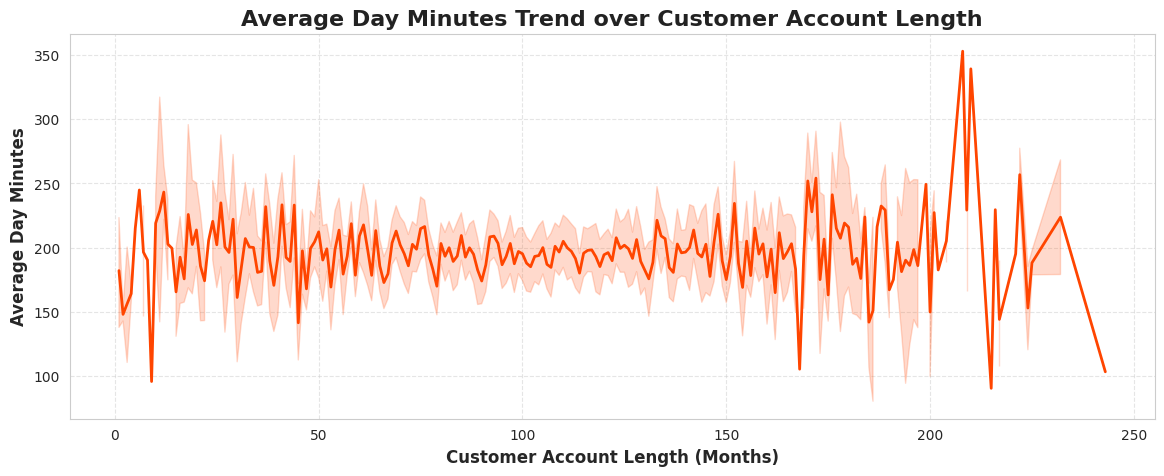

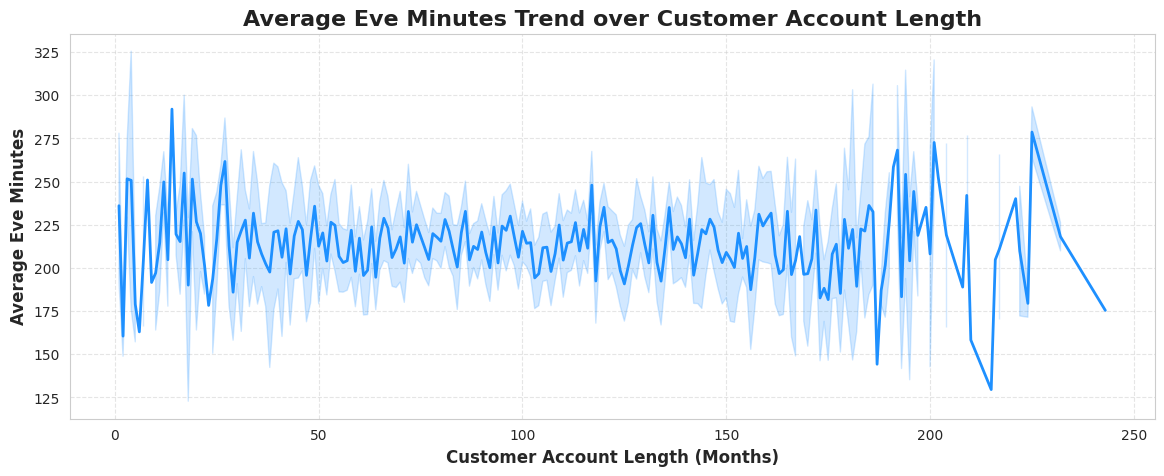

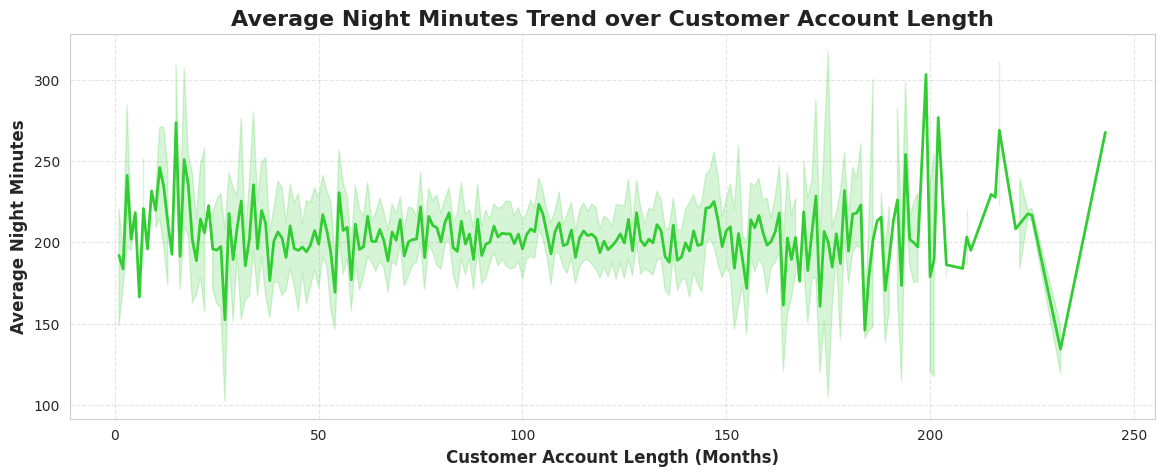

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))
sns.lineplot(x='Account_Length_Months', y='Avg_Day_Minutes', data=ufo, color='#FF4500', linewidth=2)
plt.title('Average Day Minutes Trend over Customer Account Length', fontsize=16, fontweight='bold', color='#222222')
plt.xlabel('Customer Account Length (Months)', fontsize=12, fontweight='bold')
plt.ylabel('Average Day Minutes', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(14, 5))
sns.lineplot(x='Account_Length_Months', y='Avg_Eve_Minutes', data=ufo, color='#1E90FF', linewidth=2)
plt.title('Average Eve Minutes Trend over Customer Account Length', fontsize=16, fontweight='bold', color='#222222')
plt.xlabel('Customer Account Length (Months)', fontsize=12, fontweight='bold')
plt.ylabel('Average Eve Minutes', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(14, 5))
sns.lineplot(x='Account_Length_Months', y='Avg_Night_Minutes', data=ufo, color='#32CD32', linewidth=2)
plt.title('Average Night Minutes Trend over Customer Account Length', fontsize=16, fontweight='bold', color='#222222')
plt.xlabel('Customer Account Length (Months)', fontsize=12, fontweight='bold')
plt.ylabel('Average Night Minutes', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


##**Conclusion & Suggestions:**
**Average Day Minutes Trend:**
<li>Conclusion: Stable trend, suggesting consistent average day minutes.</li>
<li>Suggestion: Focus on maintaining quality of daytime services.</li>

**Average Evening Minutes Trend:**
<li>Conclusion: Gradual increase over time.</li>
<li>Suggestion: Leverage this trend for targeted evening service promotions.</li>

**Average Night Minutes Trend:**
<li>Conclusion: Fluctuating pattern.</li>
<li>Suggestion: Investigate reasons for fluctuations, adapt services accordingly.</li>

## **Distribution of Customer Service Calls**
### Analyzing the Frequency of Customer Support Interactions

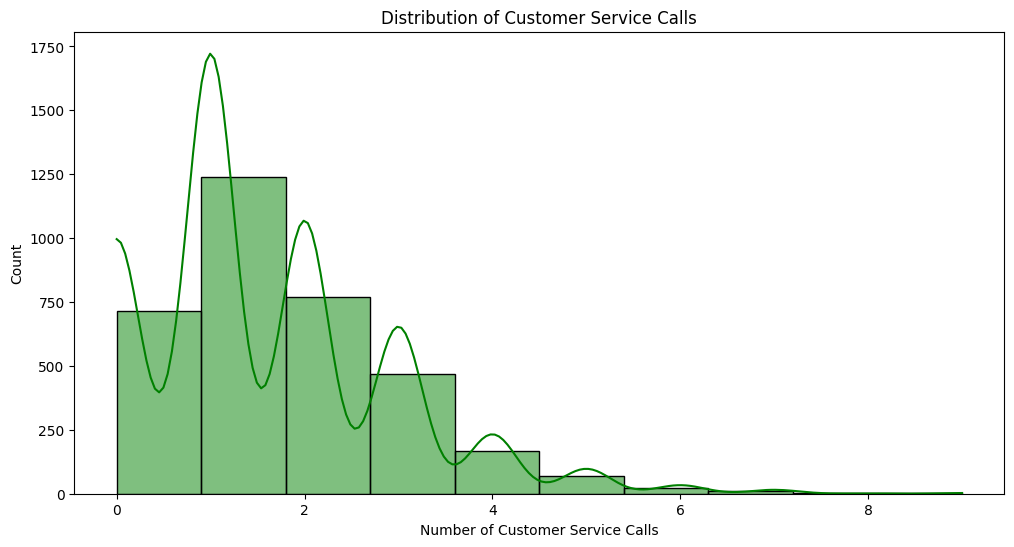

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(ufo['Customer_Service_Calls'], bins=10, kde=True, color='green')
plt.title('Distribution of Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.show()

## **Customer Service Calls and Churn Analysis**  
### Impact of Customer Support Interaction on Churn

In this section, we calculate the percentage of customers who churned (`Churn = 1`) based on their number of customer service calls.  
- We classify them into two categories:  
  - Customers who called customer service **less than 3 times**  
  - Customers who called customer service **more than 3 times**  
- The **maximum number of calls** made by a single customer is **9**.


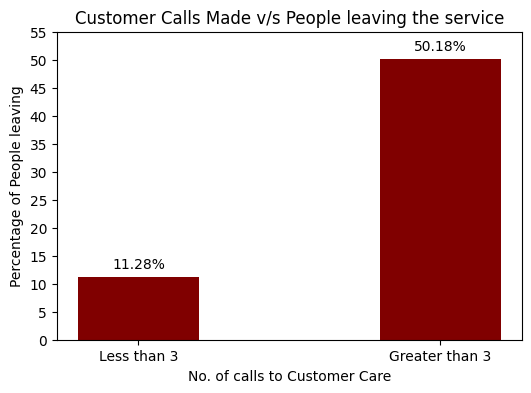

In [ ]:
total_less3=len(ufo[(ufo.Customer_Service_Calls<=3)])
total_greater3=len(ufo[(ufo.Customer_Service_Calls>3)])
less_than_3=len(ufo[(ufo.Customer_Service_Calls<=3) & (ufo.Churn==1)])
greater_than_3=len(ufo[(ufo.Customer_Service_Calls>3) & (ufo.Churn==1)])
p1=less_than_3/total_less3*100
p2=greater_than_3/total_greater3*100
plt.figure(figsize=(6, 4))
plt.bar(["Less than 3","Greater than 3"],[p1,p2],width=0.4,color ='maroon')
for i, value in enumerate([p1, p2]):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', color='black', fontsize=10)
plt.yticks(range(0, 60, 5))
plt.xlabel("No. of calls to Customer Care")
plt.ylabel("Percentage of People leaving")
plt.title("Customer Calls Made v/s People leaving the service")
plt.show()

##**Conclusion:**
<br>

**Less than or equal to 3 calls (p1=12%):**

This segment has a relatively lower churn rate, indicating that customers who make fewer calls to customer care are less likely to leave.
Suggestion: Investigate the reasons behind the low churn in this segment. It could be a sign that customers are satisfied with the service. Consider identifying and promoting features that lead to higher satisfaction.

**More than 3 calls (p2=50%):**

This segment has a significantly higher churn rate, suggesting that customers who make more calls to customer care are more likely to leave.
Suggestion: Analyze the reasons behind the high churn in this segment. It could be related to service issues, unresolved problems, or dissatisfaction. Focus on improving customer service efficiency, addressing issues promptly, and providing effective solutions to problems raised during calls.


### **Voice Mail Plan-wise Churn Distribution**  


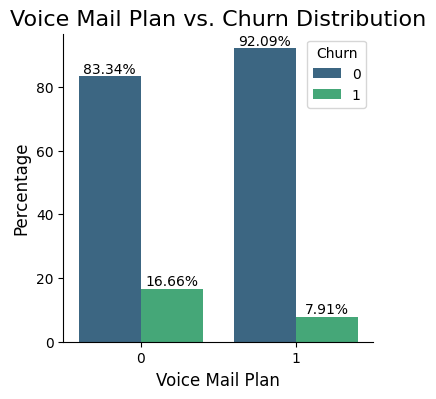

In [ ]:
percentages = ufo.groupby(['VM_Plan', 'Churn']).size() / ufo.groupby('VM_Plan').size() * 100
percentages = percentages.reset_index(name='Percentage')

plt.figure(figsize=(4, 4))
ax = sns.barplot(x='VM_Plan', y='Percentage', hue='Churn', data=percentages, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Voice Mail Plan vs. Churn Distribution', fontsize=16)
plt.xlabel('Voice Mail Plan', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Churn', loc='upper right')

sns.despine()
plt.show()

##**Conclusion:**
<li>The count of churned customers appears to be higher among those without a Voice Mail Plan compared to those with a Voice Mail Plan.</li>
<li>
Evaluate the perceived value of Voice Mail Plans among customers. If the absence of a Voice Mail Plan is a significant factor in churn, consider enhancing the value proposition of this service.</li>
<li>Analyze whether competitors are offering attractive alternatives to Voice Mail Plans. If so, evaluate the company's offerings to ensure they remain competitive in the market.</li>


### **International Plan-wise Churn Distribution**  


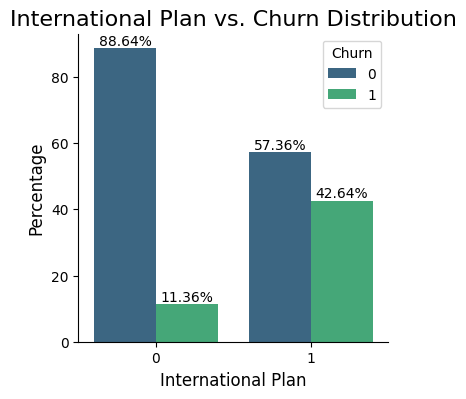

In [ ]:
percentages = ufo.groupby(['Intl_Plan', 'Churn']).size() / ufo.groupby('Intl_Plan').size() * 100
percentages = percentages.reset_index(name='Percentage')

plt.figure(figsize=(4, 4))
ax = sns.barplot(x='Intl_Plan', y='Percentage', hue='Churn', data=percentages, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('International Plan vs. Churn Distribution', fontsize=16)
plt.xlabel('International Plan', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Churn', loc='upper right')

sns.despine()
plt.show()

##**Conclusion:**
<br>
<li>The graph shows that customers with an International Plan have a higher churn rate (around 42.64%).</li>
<li>Evaluate the quality of service for customers with International Plans</li>
<li>Analyze the competitive landscape to understand if competitors are offering more attractive international plans</li>
<li>Continuously monitor customer behavior and feedback. Be prepared to adapt strategies based on changing customer preferences, market conditions, or competitor offerings.</li>


### **Number of Customer Service Calls by Churned Customers in Each State**  


<ipython-input-6-10eeae168f08>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='State_Code', y='Customer_Service_Calls', data=ufo[ufo['Churn'] == 1], palette='viridis', estimator=sum , ci=None)


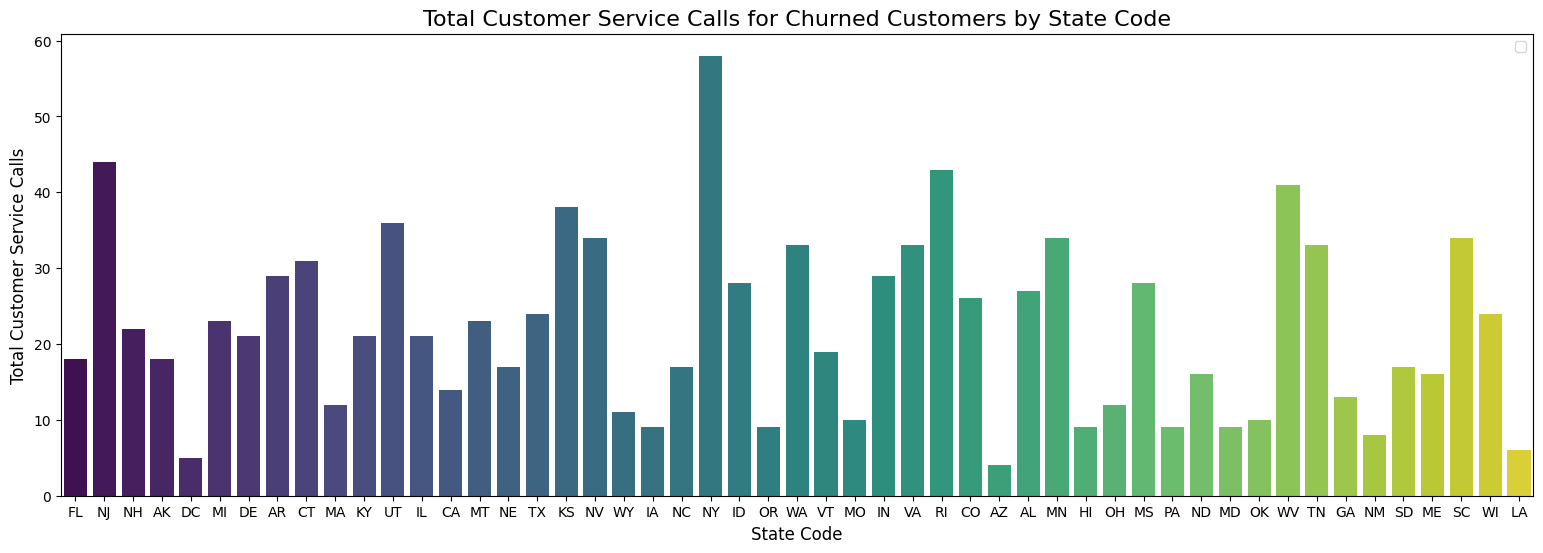

In [ ]:
# Plotting with Seaborn
plt.figure(figsize=(19, 6))
sns.barplot(x='State_Code', y='Customer_Service_Calls', data=ufo[ufo['Churn'] == 1], palette='viridis', estimator=sum , ci=None)

# Adding labels and title
plt.title('Total Customer Service Calls for Churned Customers by State Code', fontsize=16)
plt.xlabel('State Code', fontsize=12)
plt.ylabel('Total Customer Service Calls', fontsize=12)
plt.legend()
plt.show()

##**Conclusion:**
<li>States with a high total number of customer service calls for churned customers may indicate higher levels of customer dissatisfaction or issues that need attention.</li>
<li>Ensure that customer issues are being resolved promptly and satisfactorily to minimize repeated service calls.</li>
<li>Implement mechanisms to collect direct feedback from customers in states with high customer service calls.</li>
<li>Proactively communicate with customers in states with a history of high service calls.</li>

### **Number of Customer Service Calls by Churned Customers in Each Area Code**  


<ipython-input-12-544313a097bb>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Area_Code', y='Customer_Service_Calls', data=ufo[ufo['Churn'] == 1], palette='viridis', estimator=sum , ci=None , width=0.5)


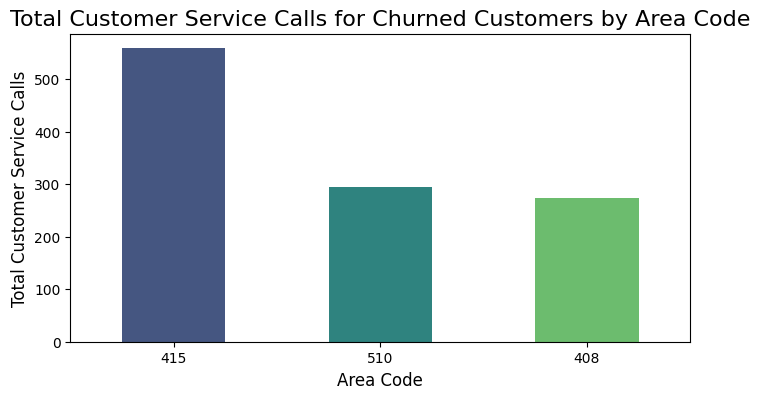

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Area_Code', y='Customer_Service_Calls', data=ufo[ufo['Churn'] == 1], palette='viridis', estimator=sum , ci=None , width=0.5)
plt.title('Total Customer Service Calls for Churned Customers by Area Code', fontsize=16)
plt.xlabel('Area Code', fontsize=12)
plt.ylabel('Total Customer Service Calls', fontsize=12)
plt.show()


##**Conclusion:**
<li>Area Code 415 has significantly higher total customer service calls for churned customers compared to other area codes.</li>
<li>Conduct a detailed analysis to understand the specific issues or challenges faced by customers in Area Code 415.</li>
<li>Consider allocating additional customer support resources specifically for Area Code 415.</li>
<li>Implement mechanisms to collect direct feedback from customers in Area Code 415.</li>

#Distribution Of Charges And Average Talktime Of Customers

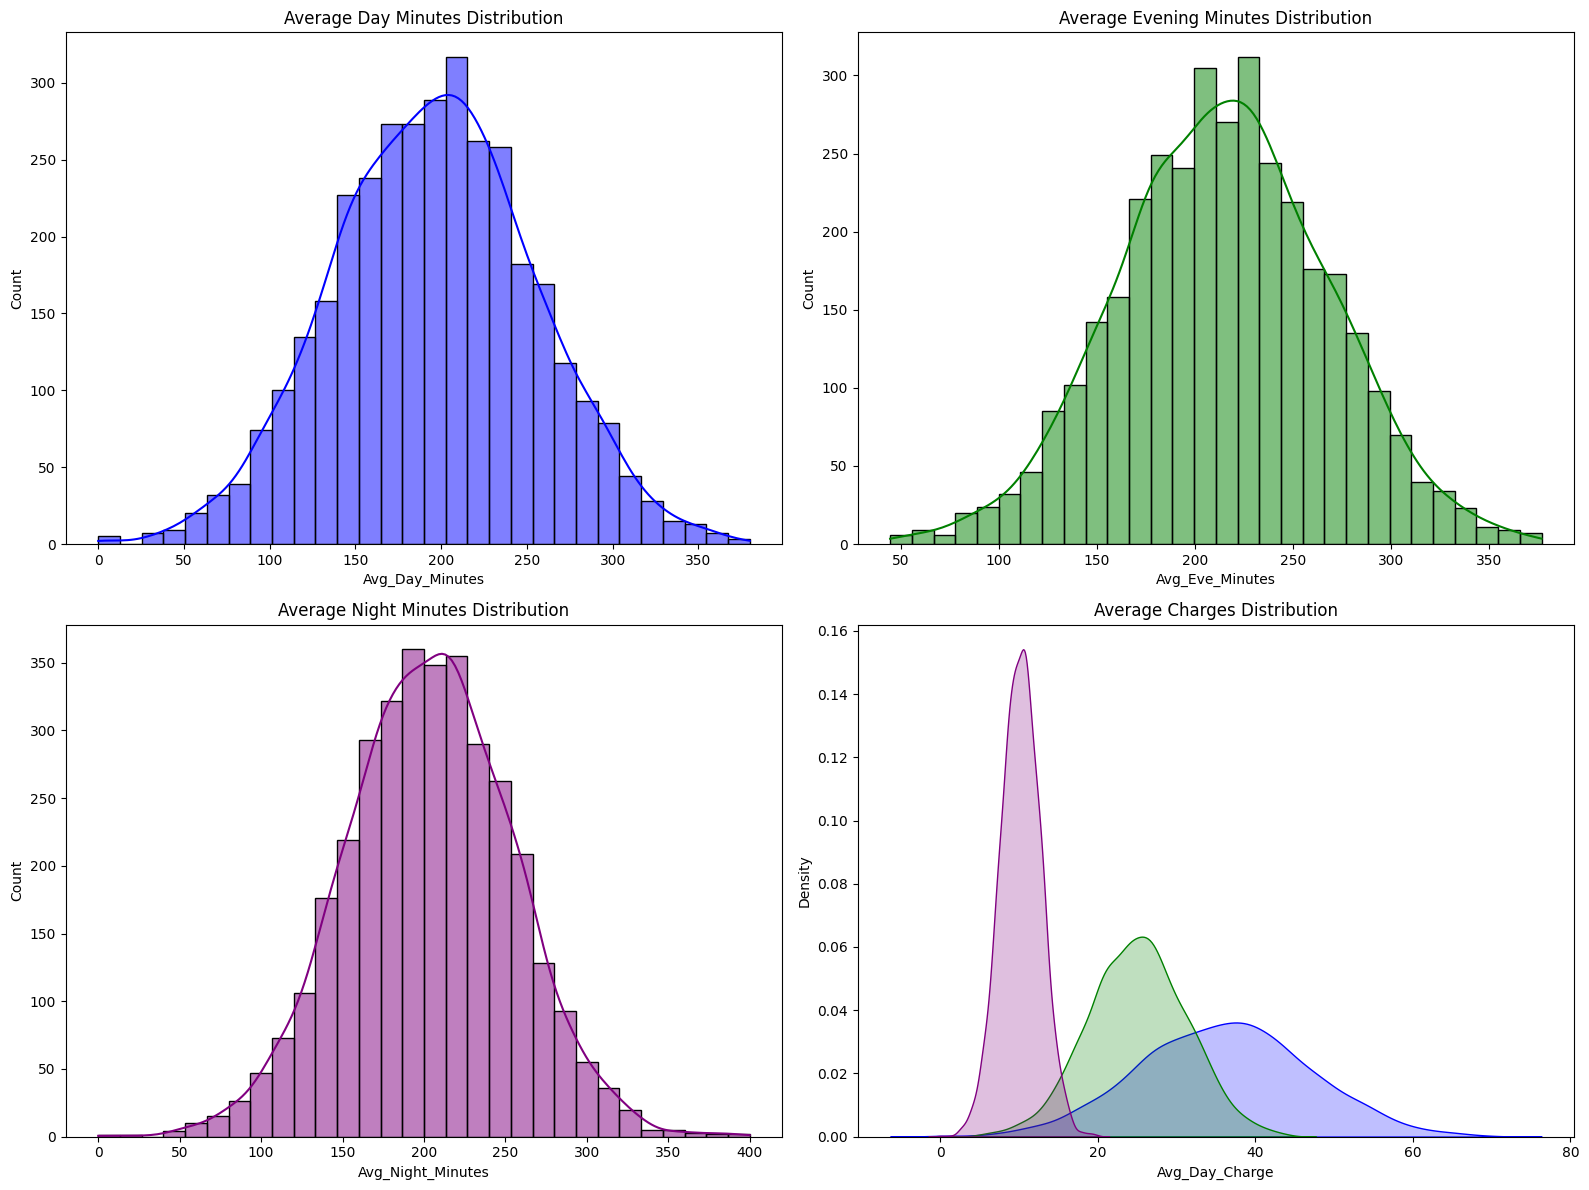

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.histplot(ufo['Avg_Day_Minutes'], bins=30, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Average Day Minutes Distribution')

sns.histplot(ufo['Avg_Eve_Minutes'], bins=30, kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Average Evening Minutes Distribution')

sns.histplot(ufo['Avg_Night_Minutes'], bins=30, kde=True, color='purple', ax=axes[1, 0])
axes[1, 0].set_title('Average Night Minutes Distribution')

sns.kdeplot(data=ufo, x='Avg_Day_Charge', fill=True, common_norm=False, color='blue', label='Avg_Day_Charge', ax=axes[1, 1])
sns.kdeplot(data=ufo, x='Avg_Eve_Charge', fill=True, common_norm=False, color='green', label='Avg_Eve_Charge', ax=axes[1, 1])
sns.kdeplot(data=ufo, x='Avg_Night_Charge', fill=True, common_norm=False, color='purple', label='Avg_Night_Charge', ax=axes[1, 1])
axes[1, 1].set_title('Average Charges Distribution')

plt.tight_layout()
plt.show()

##**Conclusion:**
<li>The kernel density plot (KDE) shows the distribution of average charges, separately for day, evening, and night.Where the day charge is maximum</li>
<li>Ensure that the charges are structured in a way that corresponds well with customer usage patterns.</li>
<li>Compare the company's pricing and usage patterns with competitors in the telecommunications industry.</li>

### **Distribution of Churned Customers with VM Plan and International Plan**  


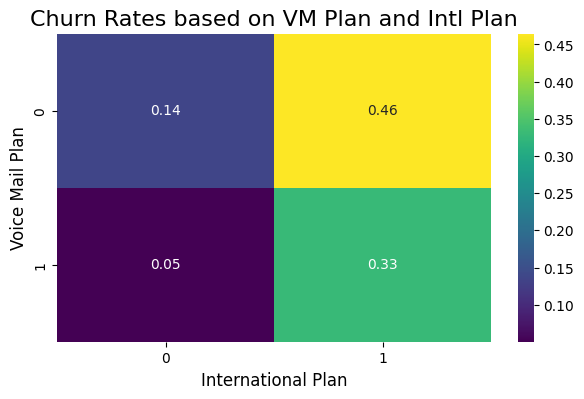

In [ ]:
# Create a pivot table for Churn Rates
churn_rates_pivot = ufo.pivot_table(index='VM_Plan', columns='Intl_Plan', values='Churn', aggfunc='mean')

# Plotting with Seaborn
plt.figure(figsize=(7, 4))
sns.heatmap(churn_rates_pivot, annot=True, cmap='viridis', fmt='.2f', cbar=True)

# Adding labels and title
plt.title('Churn Rates based on VM Plan and Intl Plan', fontsize=16)
plt.xlabel('International Plan', fontsize=12)
plt.ylabel('Voice Mail Plan', fontsize=12)

plt.show()

##**Conclusion:**
<li>Customers without Voice Mail Plan (VM_Plan = 0) but having International Plan (Intl_Plan = 0) tend to have a higher churn rate.</li>

<li>Having both Voice Mail Plan or International Plan (VM_Plan = 1 or Intl_Plan = 1) seems to have the second highest churn rate.</li>

<li>The lowest churn rate is observed among customers with Voice Mail Plan but without International Plan (VM_Plan = 1 and Intl_Plan = 1).</li>
<li>This suggests that we need to improve the International Plan service and look for the customer feedbacks.</li>


### **Number Of People vs. Voice Mail Messages For Each Churn**  


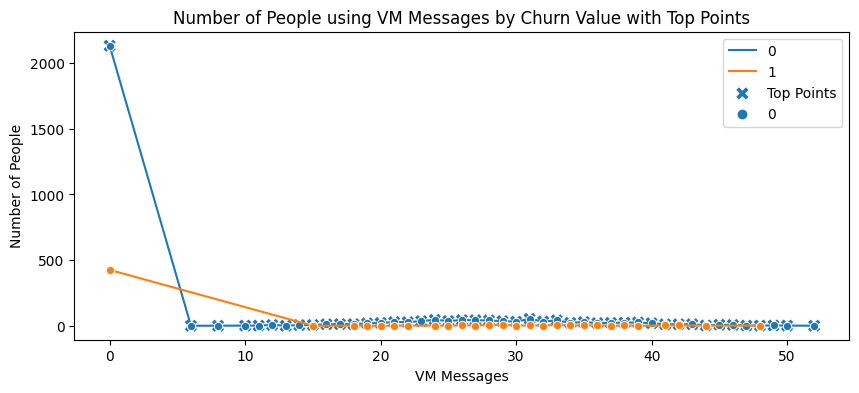

In [ ]:
plt.figure(figsize=(10, 4))
count_plot_data = ufo.groupby(['VM_Messages', 'Churn']).size().reset_index(name='Count')
top_points = count_plot_data.groupby('VM_Messages')['Count'].idxmax()
top_points_data = count_plot_data.loc[top_points]
sns.lineplot(x='VM_Messages', y='Count', hue='Churn', data=count_plot_data, marker='o')
sns.scatterplot(x='VM_Messages', y='Count', hue='Churn', data=top_points_data, marker='X', s=100, color='black', label='Top Points')
plt.xlabel('VM Messages')
plt.ylabel('Number of People')
plt.title('Number of People using VM Messages by Churn Value with Top Points')
plt.legend(loc='upper right')
plt.show()

##**Conclusion:**
<li>The line plot shows the trend of the number of people using VM Messages ('VM_Messages') for both churned (Churn=1) and non-churned (Churn=0) customers.</li>
<li>The black 'X' markers represent the top points with the maximum count for each 'VM_Messages' group</li>
<li>After analysing the plot we concluded that the message service is fine.But for further more improvement the company can involve customer feedback or surveys, that may provide insights into why certain 'VM_Messages' values are associated with higher churn rates.</li>

### **Pair Plots for Churn Wise Average Charge and Minutes for Day, Evening, and Night**  


<Figure size 1200x800 with 0 Axes>

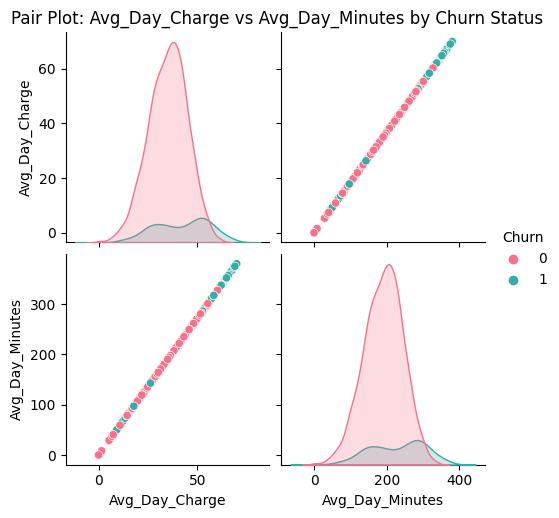

<Figure size 1200x800 with 0 Axes>

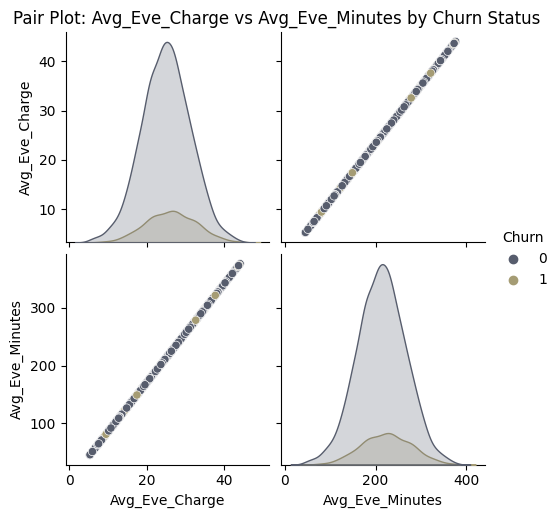

<Figure size 1200x800 with 0 Axes>

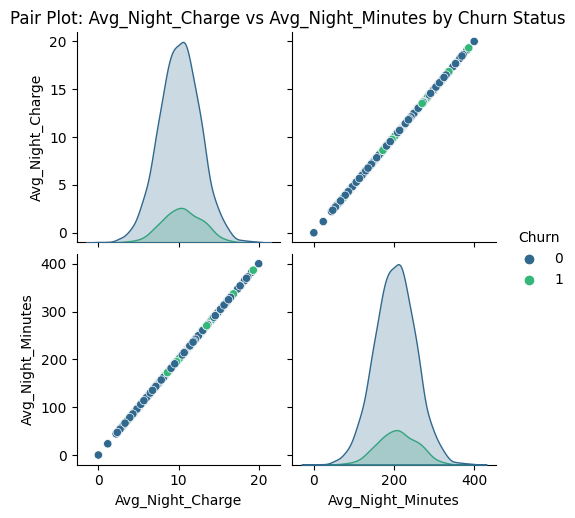

In [ ]:
plt.figure(figsize=(12, 8))
sns.pairplot(ufo, hue='Churn', vars=['Avg_Day_Charge', 'Avg_Day_Minutes'], palette='husl')
plt.suptitle('Pair Plot: Avg_Day_Charge vs Avg_Day_Minutes by Churn Status', y=1.02)
plt.show()

plt.figure(figsize=(12, 8))
sns.pairplot(ufo, hue='Churn', vars=['Avg_Eve_Charge', 'Avg_Eve_Minutes'], palette='cividis')
plt.suptitle('Pair Plot: Avg_Eve_Charge vs Avg_Eve_Minutes by Churn Status', y=1.02)
plt.show()

plt.figure(figsize=(12, 8))
sns.pairplot(ufo, hue='Churn', vars=['Avg_Night_Charge', 'Avg_Night_Minutes'], palette='viridis')
plt.suptitle('Pair Plot: Avg_Night_Charge vs Avg_Night_Minutes by Churn Status', y=1.02)
plt.show()

### **Churn Wise Charge Distribution**  


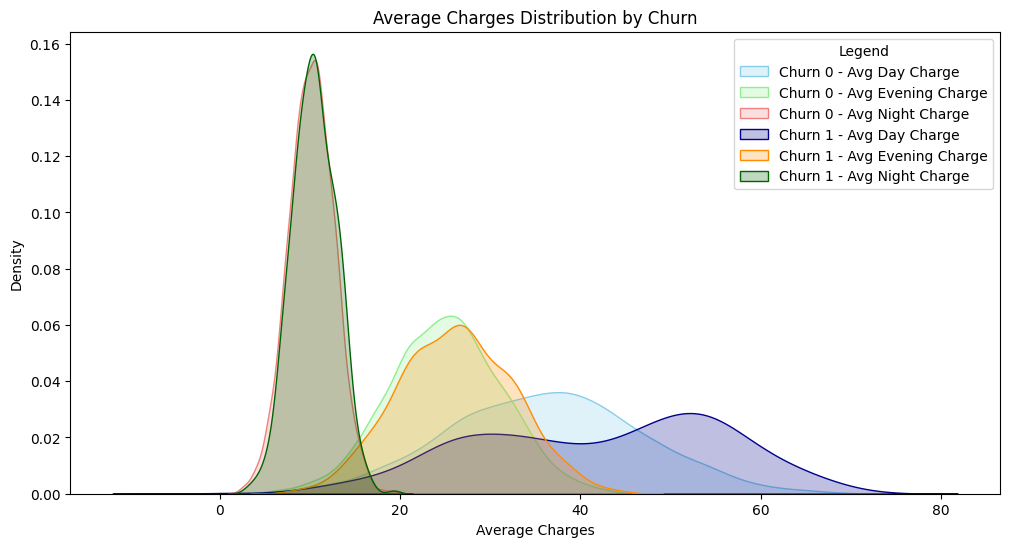

In [ ]:
plt.figure(figsize=(12, 6))

sns.kdeplot(data=ufo, x='Avg_Day_Charge', fill=True, common_norm=False, color='skyblue', label='Churn 0 - Avg Day Charge')
sns.kdeplot(data=ufo, x='Avg_Eve_Charge', fill=True, common_norm=False, color='lightgreen', label='Churn 0 - Avg Evening Charge')
sns.kdeplot(data=ufo, x='Avg_Night_Charge', fill=True, common_norm=False, color='lightcoral', label='Churn 0 - Avg Night Charge')

sns.kdeplot(data=ufo[ufo['Churn'] == 1], x='Avg_Day_Charge', fill=True, common_norm=False, color='darkblue', label='Churn 1 - Avg Day Charge')
sns.kdeplot(data=ufo[ufo['Churn'] == 1], x='Avg_Eve_Charge', fill=True, common_norm=False, color='darkorange', label='Churn 1 - Avg Evening Charge')
sns.kdeplot(data=ufo[ufo['Churn'] == 1], x='Avg_Night_Charge', fill=True, common_norm=False, color='darkgreen', label='Churn 1 - Avg Night Charge')

plt.title('Average Charges Distribution by Churn')
plt.xlabel('Average Charges')
plt.ylabel('Density')
plt.legend(title='Legend', loc='upper right')

plt.show()

### **Scatter Plot for Average Day, Night, and Evening Minutes**  



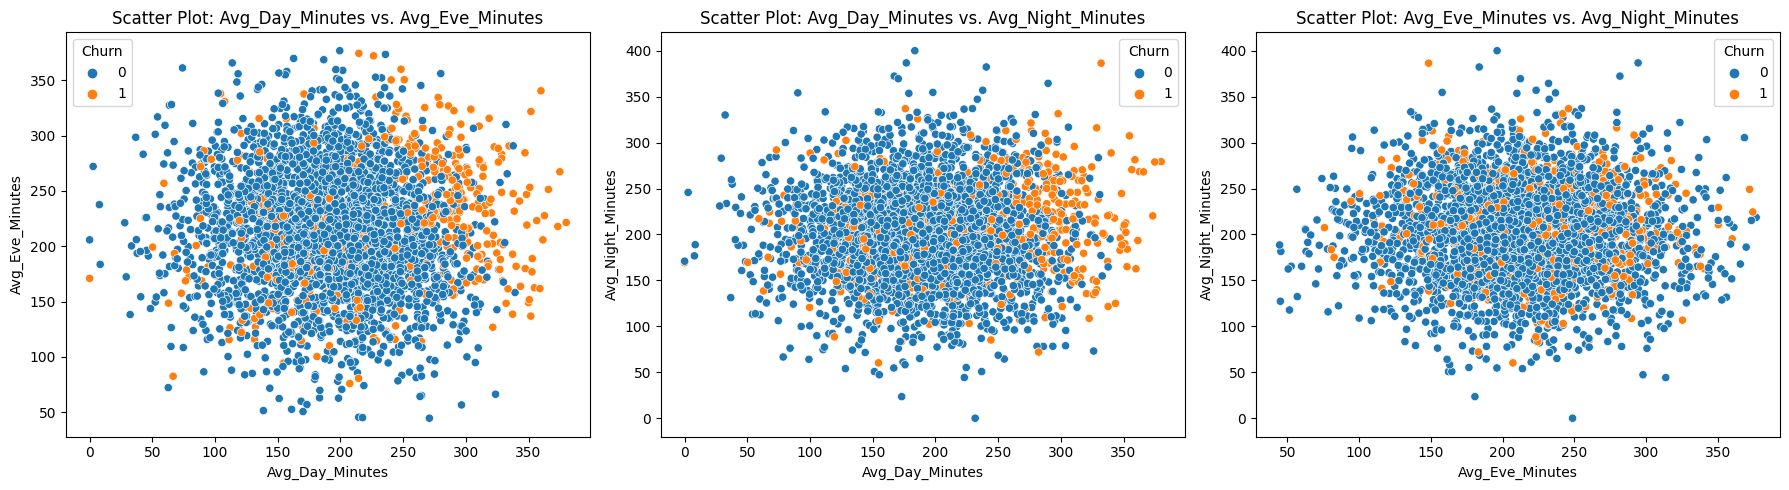

In [ ]:
plt.figure(figsize=(18, 5))

# Scatter plot for Avg_Day_Minutes
plt.subplot(1, 3, 1)
sns.scatterplot(x='Avg_Day_Minutes', y='Avg_Eve_Minutes',hue='Churn', data=ufo, color='blue')
plt.title('Scatter Plot: Avg_Day_Minutes vs. Avg_Eve_Minutes')

# Scatter plot for Avg_Eve_Minutes
plt.subplot(1, 3, 2)
sns.scatterplot(x='Avg_Day_Minutes', y='Avg_Night_Minutes',hue='Churn', data=ufo, color='green')
plt.title('Scatter Plot: Avg_Day_Minutes vs. Avg_Night_Minutes')

# Scatter plot for Avg_Night_Minutes
plt.subplot(1, 3, 3)
sns.scatterplot(x='Avg_Eve_Minutes', y='Avg_Night_Minutes',hue='Churn', data=ufo, color='yellow')
plt.title('Scatter Plot: Avg_Eve_Minutes vs. Avg_Night_Minutes')

plt.tight_layout()
plt.show()


### **Correlation Heatmap for Complete Dataset Columns**  


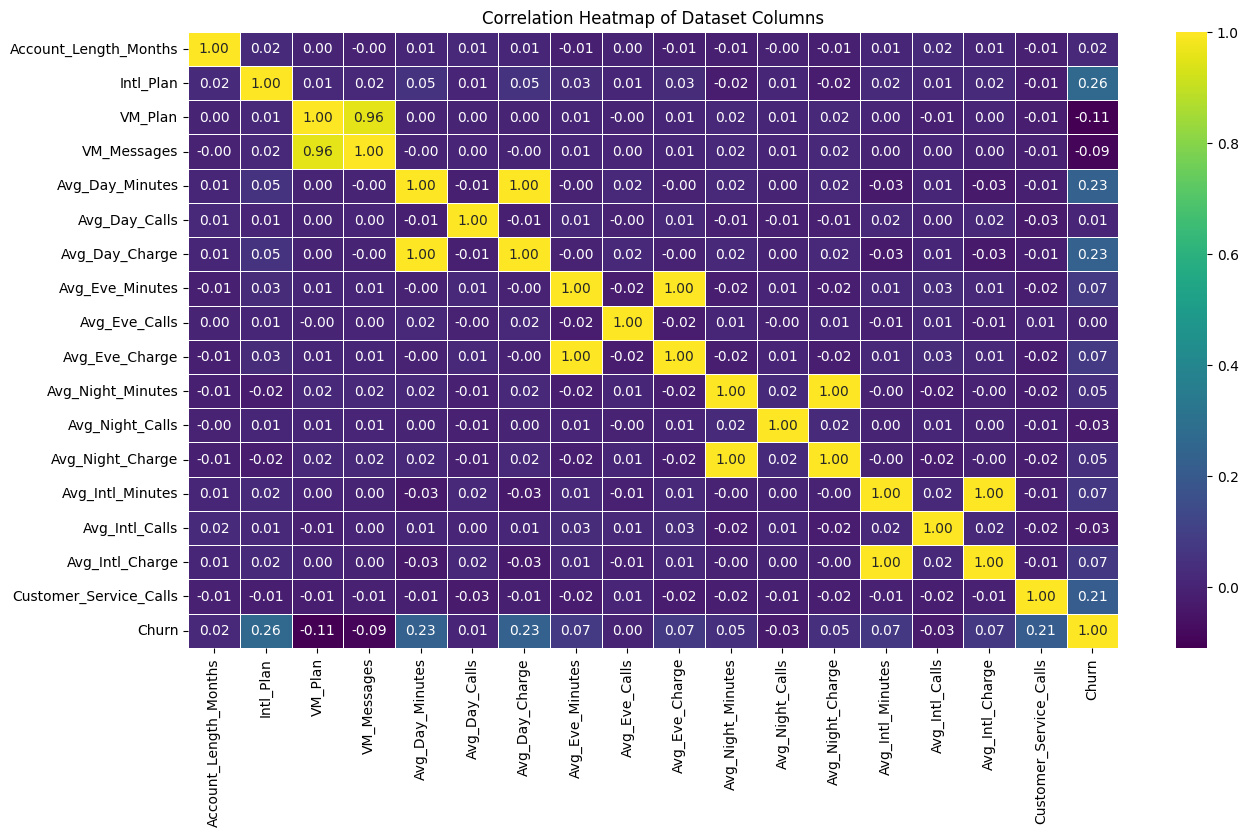

In [ ]:
correlation_matrix = ufo.corr(numeric_only=True)
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Dataset Columns')
plt.show()

##**Conclusion:**
<br>
<li>The correlation heatmap here represents the correlation between two columns of the dataset, and the color indicates the strength and direction of the correlation.<br>
<li>Darker colors represent stronger correlations.
Positive values indicate a positive correlation, negative values indicate a negative correlation, and values closer to 0 suggest a weaker correlation.
<li>Using the heatmap we will identify the strongly related columns and then analyse the dataset.